In [1]:
from data import gdf,apns,pipes,config
from map_utils import make_map
# m = make_map(gdf,apns,pipes,config)
# m
gdf.head(2)

,size,color,shape_type,alpha,label,layer,geometry
0,15.0,black,hollow_polygon,1.0,ARVIN-EDISON W.S.D.,District Boundary,"POLYGON ((-118.87548 35.21666, -118.87555 35.2..."
0,4.0,blue,line,1.0,South Canal,AEWSD North Canal,"LINESTRING (-118.77964 35.20284, -118.77974 35..."


<Axes: >

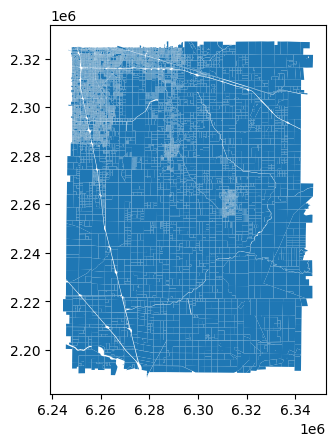

In [2]:
apns.plot()

,size,color,shape_type,alpha,label,layer,geometry
0,4.0,red,line,0.7,Frick Unit North Service Area,Frick Unit Service Area,"POLYGON Z ((-118.90097 35.28894 0.00000, -118...."
1,4.0,red,line,0.7,Frick Unit South L2 Service Area,Frick Unit Service Area,"POLYGON Z ((-118.87871 35.28889 0.00000, -118...."


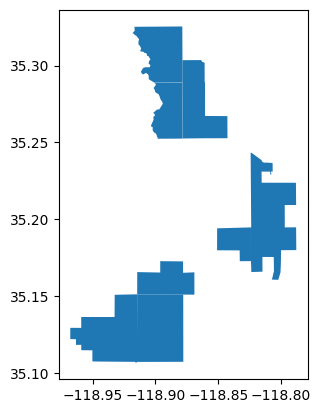

In [3]:
get_type = lambda df,shape_type: df.loc[df['shape_type'] == shape_type].iterrows()
# [[i,y] for i,y in get_type(gdf,'line')]

layer = 'Frick Unit Service Area'
# layer = 'Frick Unit Service Area 2'
# layer = 'Groundwater Service Area'
# layer = 'Proposed Turnout'
# layer = 'Landowner Wells'

df = gdf[gdf['layer'] == layer]
df.to_clipboard()
df.plot()
df.head(2)